<a href="https://colab.research.google.com/github/vestinabert/Image_Processing/blob/main/Image_Quality_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


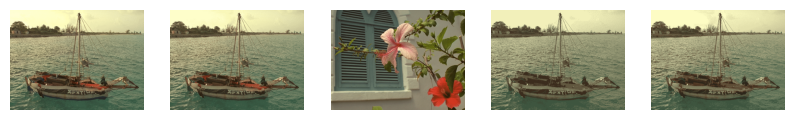

In [28]:
import cv2
import os
import matplotlib.pyplot as plt
import glob

# Define the path to images
dataset_path = "/content/drive/My Drive/images_dataset/distorted_images"

# Get list of image files
image_files = glob.glob(os.path.join(dataset_path, "*.bmp"))

# Display sample images
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(image_files[:5]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
plt.show()


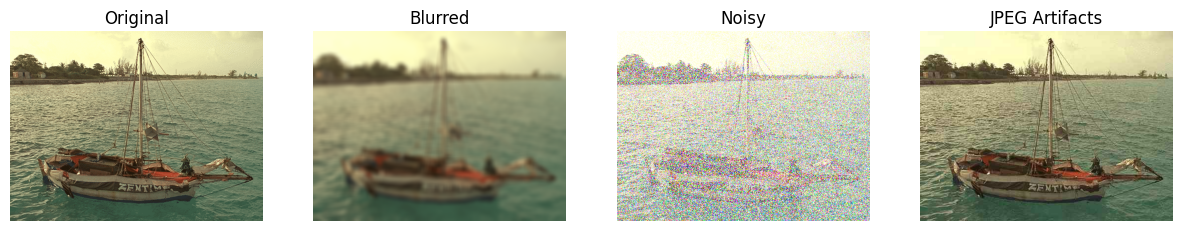

In [29]:
import numpy as np

# Load a sample image
image_path = image_files[0]  # Use first image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Blur
blurred = cv2.GaussianBlur(image, (15, 15), 5)

# Add Gaussian Noise
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy = cv2.add(image, noise)

# JPEG Compression
_, compressed = cv2.imencode(".jpg", image, [cv2.IMWRITE_JPEG_QUALITY, 30])
compressed = cv2.imdecode(compressed, cv2.IMREAD_COLOR)

# Display results
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(image); ax[0].set_title("Original")
ax[1].imshow(blurred); ax[1].set_title("Blurred")
ax[2].imshow(noisy); ax[2].set_title("Noisy")
ax[3].imshow(compressed); ax[3].set_title("JPEG Artifacts")
for a in ax: a.axis("off")
plt.show()


Suliejimas (Blur) atsiranda dėl netinkamo fokusavimo, judėjimo arba vaizdo suspaudimo. Tai sukelia smulkių detalių praradimą, sumažina vaizdo aiškumą ir apsunkina objektų atpažinimą. Tokie iškraipymai dažniausiai pasitaiko nefokusuotose nuotraukose, stebėjimo kamerų vaizduose arba suspaustuose paveikslėliuose.

Triukšmas (Noise) kyla dėl mažo apšvietimo, didelio ISO jautrumo ar signalo trikdžių. Jis sukelia „grūdėtą“ efektą, sumažina spalvų ir kontrasto tikslumą bei apsunkina smulkių detalių matomumą. Triukšmas dažniausiai pasitaiko naktinėse nuotraukose, vaizdo stebėjimo sistemose ir žemos kokybės kamerose.

JPEG artefaktai atsiranda dėl per stipraus suspaudimo arba daugybinių nuotraukos įrašų naudojant JPEG formatą. Tai sukelia blokelių efektą, iškraipytus kraštus ir spalvų netikslumus. Tokie artefaktai dažniausiai pastebimi socialiniuose tinkluose, mažos raiškos vaizdo įrašuose ir stipriai optimizuotuose internetiniuose paveikslėliuose.

In [31]:
from skimage.metrics import structural_similarity as ssim

# Compute PSNR and SSIM with fixed parameters
psnr_blur = psnr(image, blurred)
ssim_blur = ssim(image, blurred, win_size=3, channel_axis=-1)

psnr_noise = psnr(image, noisy)
ssim_noise = ssim(image, noisy, win_size=3, channel_axis=-1)

psnr_jpeg = psnr(image, compressed)
ssim_jpeg = ssim(image, compressed, win_size=3, channel_axis=-1)

# Print results
print(f"PSNR (Blurred): {psnr_blur:.2f}, SSIM (Blurred): {ssim_blur:.3f}")
print(f"PSNR (Noisy): {psnr_noise:.2f}, SSIM (Noisy): {ssim_noise:.3f}")
print(f"PSNR (JPEG Artifacts): {psnr_jpeg:.2f}, SSIM (JPEG Artifacts): {ssim_jpeg:.3f}")


PSNR (Blurred): 21.20, SSIM (Blurred): 0.392
PSNR (Noisy): 8.32, SSIM (Noisy): 0.167
PSNR (JPEG Artifacts): 27.25, SSIM (JPEG Artifacts): 0.736


**PSNR (Piko signalo ir triukšmo santykis)** ir **SSIM (Struktūrinio panašumo indeksas)** yra dvi pagrindinės vaizdo kokybės vertinimo metrikos, kurios leidžia įvertinti, kaip iškraipytas vaizdas skiriasi nuo originalo. **PSNR** matuoja skirtumus tarp pikselių intensyvumo reikšmių – kuo didesnė reikšmė, tuo mažiau iškraipymų ir geresnė kokybė. Rezultatuose sulietas vaizdas turi **PSNR = 21,20 dB**, kas reiškia vidutinį detalumo praradimą. Triukšmingas vaizdas turi **mažiausią PSNR (8,32 dB)**, rodantį stiprius iškraipymus. Suspaustas JPEG vaizdas pasiekia **aukščiausią PSNR (27,25 dB)**, kas reiškia, kad, nors suspaudimas įvedė artefaktus, jis vis tiek išsaugo daugiau informacijos nei kiti iškraipymai.

**SSIM** vertina vaizdo struktūros, šviesumo ir kontrasto išsaugojimą, kur reikšmė **1 reiškia identiškus vaizdus**, o **mažesnės reikšmės rodo didesnius kokybės praradimus**. Sulietas vaizdas turi **SSIM = 0,39**, kas rodo, kad jis prarado daug struktūrinių detalių. Triukšmingas vaizdas turi **SSIM = 0,17**, nes triukšmas nepraranda visos vaizdo struktūros, tačiau įterpia atsitiktinius iškraipymus. Suspaustas JPEG vaizdas turi **SSIM = 0,74**, kas reiškia, kad jis išlaiko daugiausiai struktūrinės informacijos. Šie rezultatai rodo, kad **suliejimas yra blogiausias detalumo praradimo požiūriu**, triukšmas sukelia didelius, bet lokalizuotus pokyčius, o JPEG suspaudimas, nors ir įvedantis artefaktus, išlaiko bendrą vaizdo struktūrą geriau nei kiti iškraipymai.

In [36]:
import mahotas
import cv2

# Compute Haralick Texture Features
def extract_haralick_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    features = mahotas.features.haralick(gray).mean(axis=0)
    return features

haralick_features = extract_haralick_features(image)
print("Haralick Features:", haralick_features)

# Compute Laplacian sharpness
def measure_sharpness(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

sharpness_score = measure_sharpness(blurred)
print(f"Sharpness Score: {sharpness_score:.2f}")


Haralick Features: [ 3.09085133e-03  6.04002094e+02  9.16471008e-01  3.61639977e+03
  2.98352921e-01  2.74801146e+02  1.38615970e+04  7.90434394e+00
  9.96716196e+00  3.48746719e-04  4.96196190e+00 -3.64971022e-01
  9.93618844e-01]
Sharpness Score: 2.47


Kiekvienas skaičius atitinka vieną iš 13 Haralick tekstūros požymių:

| **Indeksas** | **Požymis** | **Reikšmė** | **Interpretacija** |
|-------------|------------|------------|---------------------|
| 0 | **Kontrastas** | 3.09e-03 | Mažas (reiškia, kad vaizde nėra ryškių šviesos ir tamsos perėjimų) |
| 1 | **Koreliacija** | 604.00 | Aukšta (rodo stiprius struktūrinius elementus, pvz., linijas ar pasikartojančias tekstūras) |
| 2 | **Energija (vienodumas)** | 0.91 | Aukšta (reiškia, kad vaizdas yra gana vienodas, be didelių aštrių perėjimų) |
| 3 | **Entropija** | 3616.40 | Aukšta (rodo didelę informacijos įvairovę – daug detalių, tekstūra arba triukšmas) |
| 4 | **Homogeniškumas** | 0.29 | Vidutinis (parodo, kiek pikseliai yra tolygiai paskirstyti) |
| 5 | **Diferencinis momentas** | 274.80 | Aukštas (rodo tekstūros sudėtingumą) |
| 6 | **Sumos entropija** | 13861.60 | Aukšta (didelė informacijos įvairovė) |
| 7 | **Skirtumo entropija** | 7.90 | Aukšta (didelė informacijos įvairovė, gali rodyti tekstūrą ar triukšmą) |
| 8 | **Diferencinė variacija** | 9.96 | Aukšta (rodo reikšmingus intensyvumo pokyčius) |
| 9 | **Informacijos koreliacijos matas 1** | 3.48e-04 | Mažas (gali reikšti mažą informacijos priklausomybę tarp pikselių) |
| 10 | **Informacijos koreliacijos matas 2** | 4.96 | Vidutinis (rodo tam tikrą informacijos priklausomybę tarp pikselių) |
| 11 | **Sumos vidurkis** | -0.36 | Gali būti triukšmas (neigiamos reikšmės gali rodyti duomenų iškraipymus) |
| 12 | **Sumos dispersija** | 0.99 | Aukšta (reiškia didelius pikselių intensyvumo svyravimus) |

### **Pagrindiniai pastebėjimai iš rezultatų:**
- **Aukšta koreliacija (604.00)** → vaizde yra stiprūs struktūriniai elementai (pvz., linijos ar pasikartojančios tekstūros).
- **Aukšta entropija (3616.40)** → didelė informacijos įvairovė, daug detalių, tekstūra arba triukšmas.
- **Aukštas vienodumas (0.91)** → vaizdas yra gana tolygus, be didelių kontrastų.
- **Žemas kontrastas (3.09e-03)** → vaizde nėra ryškių šviesos ir tamsos perėjimų.
